In [3]:
%matplotlib inline
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import requests
import json
import time
import numpy as np
from yelpapi import YelpAPI
from pprint import pprint
from API import api_key
import scipy.stats as stats
from scipy.stats import linregress
import warnings
warnings.filterwarnings('ignore')

In [4]:
# creat the code to get the data from yelp 

url = 'https://api.yelp.com/v3/businesses/search'
API = api_key
headers = {'Authorization': 'bearer %s' % API}
offset = 0
business = []


# loop throught the URL to get 500 rows of data 

for i in range(0, 500, 50):
    params = {'location': 'Cleveland, Ohio' , 'offset': offset , 'limit': 50 }
    response = requests.get(url, params=params, headers=headers)
    business.append(response.json())
    offset += 50
    
    if offset % 50 == 0:
        time.sleep(5)

        


In [5]:
business[1]['businesses']

[{'id': 'cUwNW5NEua_yMcAx-X2sMg',
  'alias': 'grumpys-cafe-cleveland',
  'name': "Grumpy's Cafe",
  'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/pxoH6ePSvagPvG9ckRv-Zg/o.jpg',
  'is_closed': False,
  'url': 'https://www.yelp.com/biz/grumpys-cafe-cleveland?adjust_creative=TshdU4XV3-ETjsHU3-ICtw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=TshdU4XV3-ETjsHU3-ICtw',
  'review_count': 328,
  'categories': [{'alias': 'breakfast_brunch', 'title': 'Breakfast & Brunch'},
   {'alias': 'salad', 'title': 'Salad'}],
  'rating': 4.0,
  'coordinates': {'latitude': 41.476519, 'longitude': -81.690993},
  'transactions': ['delivery'],
  'price': '$$',
  'location': {'address1': '2621 W 14th St',
   'address2': '',
   'address3': '',
   'city': 'Cleveland',
   'zip_code': '44113',
   'country': 'US',
   'state': 'OH',
   'display_address': ['2621 W 14th St', 'Cleveland, OH 44113']},
  'phone': '+12162415025',
  'display_phone': '(216) 241-5025',
  'distance': 1589.909540

In [6]:
# creat a loop that will open all the 10 json files togeather

full_data = []
for data in business:
    full_data = full_data + data["businesses"]
    


len(full_data)

500

In [7]:
# convert 10 json files to a DF

df = pd.DataFrame.from_dict(full_data)
df

alias  \
0                                  lola-cleveland   
1                            townhall-cleveland-2   
2                            l-albatros-cleveland   
3                    slymans-restaurant-cleveland   
4            sokolowskis-university-inn-cleveland   
5         great-lakes-brewing-company-cleveland-4   
6                             momocho-cleveland-2   
7                         luckys-cafe-cleveland-3   
8                             happy-dog-cleveland   
9                          superior-pho-cleveland   
10                 mia-bella-restaurant-cleveland   
11                 soho-chicken-whiskey-cleveland   
12                           mabels-bbq-cleveland   
13           porco-lounge-and-tiki-room-cleveland   
14        rising-star-coffee-roasters-cleveland-2   
15                      masons-creamery-cleveland   
16                    jack-frost-donuts-cleveland   
17              the-greenhouse-tavern-cleveland-2   
18                     tremont-taphouse-cleveland   
19                crop-bistro-and-bar-cleveland-3   
20                            boaz-cafe-cleveland   
21                               barrio-cleveland   
22                       bakersfield-cleveland-15   
23                    velvet-tango-room-cleveland   
24               butcher-and-the-brewer-cleveland   
25       the-bourbon-street-barrel-room-cleveland   
26                           flying-fig-cleveland   
27                                ginko-cleveland   
28                    blue-point-grille-cleveland   
29                       pour-cleveland-cleveland   
..                                            ...   
470                  touch-supper-truck-cleveland   
471                    duck-island-club-cleveland   
472  cleveland-tiffin-punjabi-dhaba-north-randall   
473                     joe-maxx-coffee-cleveland   
474   rubins-family-restaurant-and-deli-cleveland   
475         east-end-restaurant-and-bar-cleveland   
476                     guys-pizza-co-cleveland-3   
477               wrap-it-up-food-truck-cleveland   
478                      casamels-pizza-cleveland   
479                pho-and-rice-cleveland-heights   
480     cha-spirits-and-pizza-kitchen-cleveland-2   
481                           la-fiesta-cleveland   
482             mazzone-and-sons-bakery-cleveland   
483                       public-square-cleveland   
484                          cozumel-independence   
485   zoma-ethiopian-restaurant-cleveland-heights   
486                azure-rooftop-lounge-cleveland   
487     gentiles-bakery-catering-and-deli-parma-2   
488                               shays-cleveland   
489            cleveland-history-center-cleveland   
490                            dive-bar-cleveland   
491                       roses-braai-cleveland-2   
492                    tick-tock-tavern-cleveland   
493     cedarland-mediterranean-cuisine-cleveland   
494                   slymans-tavern-independence   
495                  angies-soul-cafe-cleveland-2   
496                      souper-market-lakewood-2   
497                        cafe-ah-roma-cleveland   
498                       the-hot-dog-diner-parma   
499                        dragon-light-cleveland   

                                            categories  \
0    [{'alias': 'wine_bars', 'title': 'Wine Bars'},...   
1    [{'alias': 'newamerican', 'title': 'American (...   
2             [{'alias': 'french', 'title': 'French'}]   
3    [{'alias': 'tradamerican', 'title': 'American ...   
4    [{'alias': 'polish', 'title': 'Polish'}, {'ali...   
5    [{'alias': 'breweries', 'title': 'Breweries'},...   
6           [{'alias': 'mexican', 'title': 'Mexican'}]   
7    [{'alias': 'coffee', 'title': 'Coffee & Tea'},...   
8    [{'alias': 'bars', 'title': 'Bars'}, {'alias':...   
9    [{'alias': 'vietnamese', 'title': 'Vietnamese'...   
10   [{'alias': 'mediterranean', 'title': 'Mediterr...   
11   [{'alias': 'southern', 'title': 'Southern'}, {...   
12 

In [8]:
# clean any dic col. in this loop

idx = 0
lats = []
lngs = []
Bus_titles = []
ZIPS = []
Trans = []
Prices = []
for i, r in df.iterrows():
    lat = r["coordinates"]["latitude"]
    lng = r["coordinates"]["longitude"]
    titles = r["categories"][0]["title"]
    ZIP = r["location"]["zip_code"]
    if len(r['transactions']) == 0:
        Tran = "NO"
    else:
        Tran = "YES"
    
    if r["price"] == str("$"):
        price = 1
    elif r["price"] == str("$$"):
        price = 2
    
    else: price = 3
        
    
        
    #print(price)
    #print(lat,lng)
    lats.append(lat)
    lngs.append(lng)
    Bus_titles.append(titles)
    ZIPS.append(ZIP)
    Trans.append(Tran)
    Prices.append(price)    


    #print(Prices)



    
#print(lats)
#print(lngs)
#DF = df.insert(loc=6, column='A', value=Bus_titles)
#df

In [9]:
# an DF that only have the cleaned Cols.

clean_df = pd.DataFrame(data={'Categories': Bus_titles, 
                              'latitude': lats,
                              'longitude': lngs,
                              'zip_code': ZIPS,
                              'Delivery': Trans,
                              'Price':Prices})
clean_df.head()

Categories   latitude  longitude zip_code Delivery  Price
0               Wine Bars  41.498830 -81.690350    44115       NO      3
1          American (New)  41.485492 -81.703914    44113       NO      2
2                  French  41.511744 -81.606395    44106       NO      3
3  American (Traditional)  41.512860 -81.671250    44114       NO      2
4                  Polish  41.484750 -81.690050    44113       NO      2

In [10]:
# adding the cleaned col to the original DF

conat_df = pd.concat([df,clean_df], axis=1 )

In [11]:
# Display the new DF with a spacific col for better

Buis_df = conat_df[['name','Categories','zip_code','latitude','longitude','Delivery','rating','review_count','Price','location']]
Buis_df.head()

name              Categories zip_code   latitude  \
0                         Lola               Wine Bars    44115  41.498830   
1                     Townhall          American (New)    44113  41.485492   
2                   L'Albatros                  French    44106  41.511744   
3          Slyman's Restaurant  American (Traditional)    44114  41.512860   
4  Sokolowski's University Inn                  Polish    44113  41.484750   

   longitude Delivery  rating  review_count  Price  \
0 -81.690350       NO     4.0           981      3   
1 -81.703914       NO     4.0           993      2   
2 -81.606395       NO     4.5           604      3   
3 -81.671250       NO     4.5           417      2   
4 -81.690050       NO     4.5           464      2   

                                            location  
0  {'address1': '2058 E 4th St', 'address2': '', ...  
1  {'address1': '1909 W 25th St', 'address2': '',...  
2  {'address1': '11401 Bellflower Rd', 'address2'...  
3  {'address1': '3106 Saint Clair Ave NE', 'addre...  
4  {'address1': '1201 University Rd', 'address2':...

F_onewayResult(statistic=7.0886878070736694, pvalue=0.00092153968373446431)

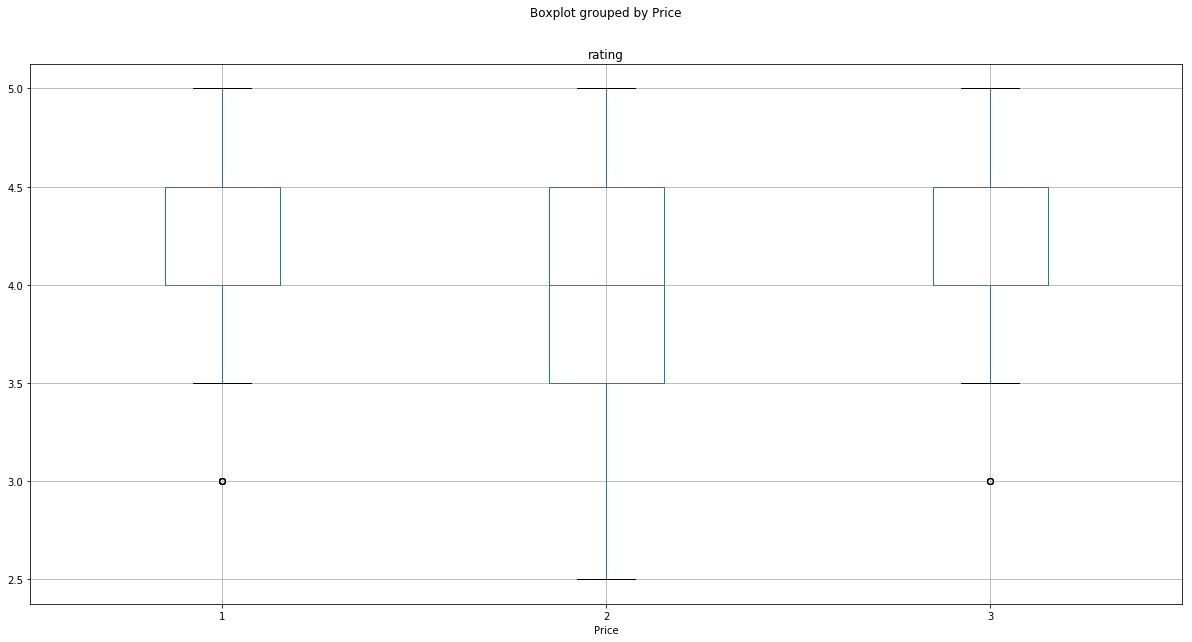

In [15]:
Buis_df.boxplot("rating", by="Price", figsize=(20, 10))
group1 = df[Buis_df["Price"] == 1]["rating"]
group2 = df[Buis_df["Price"] == 2]["rating"]
group3 = df[Buis_df["Price"] == 3]["rating"]
stats.f_oneway(group1, group2, group3)

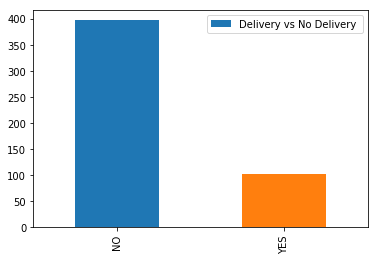

In [119]:
Deliv = Buis_df['Delivery'].value_counts()
#print(Deliv)

Deliv.plot.bar(label = "Delivery vs No Delivery ")
plt.legend()

In [28]:
# creat a DF from a Categories and Delivery

groupby_cate_deliv = Buis_df.groupby(['Categories','Delivery'],
                                     as_index=False).sum().sort_values("rating", ascending=False)

cate_deliv_df = pd.DataFrame(groupby_cate_deliv)
cate_deliv_df.head()

Categories Delivery     latitude    longitude  rating  review_count  \
2   American (New)       NO  1452.185213 -2858.808442   134.5          6861   
33    Coffee & Tea       NO  1244.741531 -2450.220668   129.5          3154   
69         Italian       NO   829.871672 -1633.393446    80.0          2201   
93           Pizza       NO   746.750064 -1469.892277    74.5          1852   
11            Bars       NO   788.128645 -1552.269313    74.5          3091   

    Price  
2      72  
33     34  
69     47  
93     29  
11     33

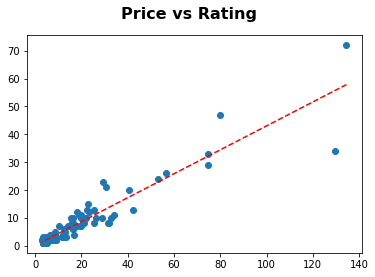

In [30]:
# Is there a relation bet rating and prices?
# Set data
x = cate_deliv_df['rating']
y = cate_deliv_df['Price']
slope, intercept,r, p, std_err = stats.linregress(x, y)
fit = slope * x + intercept
#print(fit)



fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='o')
ax.plot(x, fit, 'r--')
fig.suptitle("Price vs Rating", fontsize=16, fontweight="bold")
plt.show()



In [66]:
x_axis = cate_deliv_df["Delivery"]
y_axis = cate_deliv_df["Categories"]

In [67]:
cate_deliv_df.tail(10)

Categories Delivery   latitude  longitude  rating  review_count  \
105              Seafood      YES  41.499080 -81.698350     3.5           227   
124                 Thai      YES  41.485268 -81.703735     3.5           123   
112              Spanish       NO  41.498230 -81.700140     3.5           192   
36              Cupcakes       NO  41.475735 -81.690926     3.5            38   
23               Burgers      YES  41.501050 -81.676991     3.5            73   
67                 Irish      YES  41.498561 -81.690233     3.5           252   
74               Karaoke       NO  41.487780 -81.724340     3.5            43   
87       Modern European       NO  41.456300 -81.644770     3.5            38   
15               Bowling       NO  41.499507 -81.689842     3.0           209   
90   New Mexican Cuisine       NO  41.510834 -81.696198     3.0           220   

     Price  
105      2  
124      2  
112      3  
36       1  
23       1  
67       2  
74       1  
87       1  
15       2  
90       2

In [121]:
higest_Categ = cate_deliv_df.loc[cate_deliv_df["Delivery"] == "YES" , ["rating"]]

lowest_categ = cate_deliv_df.loc[cate_deliv_df["Delivery"] == "NO" , ["rating"]]

#plt.show()

In [ ]:
xa = cate_deliv_df['rating']
y = cate_deliv_df['Price']
slope, intercept,r, p, std_err = stats.linregress(x, y)
fit = slope * x + intercept
#print(fit)



fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='o')
ax.plot(x, fit, 'r--')
fig.suptitle("Price vs Rating", fontsize=16, fontweight="bold")
plt.show()

In [83]:
lowest_categ = cate_deliv_df.loc[cate_deliv_df["Delivery"] == "NO"]
lowest_categ.count()

Categories      90
Delivery        90
latitude        90
longitude       90
rating          90
review_count    90
Price           90
dtype: int64

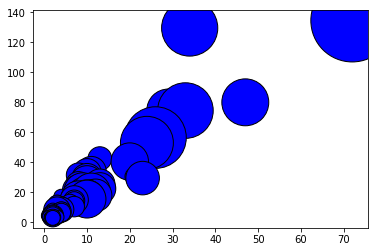

In [89]:
#cate_deliv_df.plt.scatter(cate_deliv_df['Categories'], cate_deliv_df['Delivery'])
plt.scatter(cate_deliv_df['Price'],cate_deliv_df['rating'], 
s = cate_deliv_df['review_count'] ,marker="o", facecolors="blue", edgecolors="black")

In [107]:
gruopby_Deliv =cate_deliv_df.groupby('rating').agg({"Delivery": "count"})
gruopby_Deliv.sum()

Delivery    136
dtype: int64